In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
import six
from sklearn.metrics import accuracy_score,confusion_matrix


In [2]:
from six import StringIO  

In [3]:
#Reading csv file
attrition = pd.read_csv("Attrition.csv")

In [4]:
attrition.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,1.838776,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,2.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,2.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,2.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,2,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,2,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,2,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
#split dataset in features and target variable
feature_cols = ['DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',  'RelationshipSatisfaction', 
                'WorkLifeBalance', 'YearsAtCompany','Age', 'DailyRate', 'StandardHours','TotalWorkingYears', 
                'TrainingTimesLastYear','YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 
                'StockOptionLevel']
X = attrition[feature_cols] # Features
y = attrition['Attrition'] # Target variable

In [7]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

In [8]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)


#Predict the response for train dataset
y_train_pred = clf.predict(X_train)


#Predict the response for test dataset
y_test_pred = clf.predict(X_test)

In [9]:
# Model Accuracy, how often is the classifier correct?

print("Accuracy (Using Train Data):",metrics.accuracy_score(y_train, y_train_pred))
print("Accuracy (Using Test Data ):",metrics.accuracy_score(y_test, y_test_pred))

Accuracy (Using Train Data): 1.0
Accuracy (Using Test Data ): 0.7108843537414966


In [10]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_10 <= 2.50
|   |--- feature_0 <= 7.50
|   |   |--- feature_7 <= 24.00
|   |   |   |--- feature_3 <= 69.50
|   |   |   |   |--- feature_3 <= 47.50
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_3 >  47.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  69.50
|   |   |   |   |--- feature_4 <= 2.50
|   |   |   |   |   |--- feature_13 <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_13 >  0.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_4 >  2.50
|   |   |   |   |   |--- class: 2
|   |   |--- feature_7 >  24.00
|   |   |   |--- feature_8 <= 132.00
|   |   |   |   |--- class: 1
|   |   |   |--- feature_8 >  132.00
|   |   |   |   |--- feature_3 <= 46.00
|   |   |   |   |   |--- feature_4 <= 2.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_4 >  2.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_3 >  46.00
|   |   |   |   |   |--- class: 2
|   |--- 

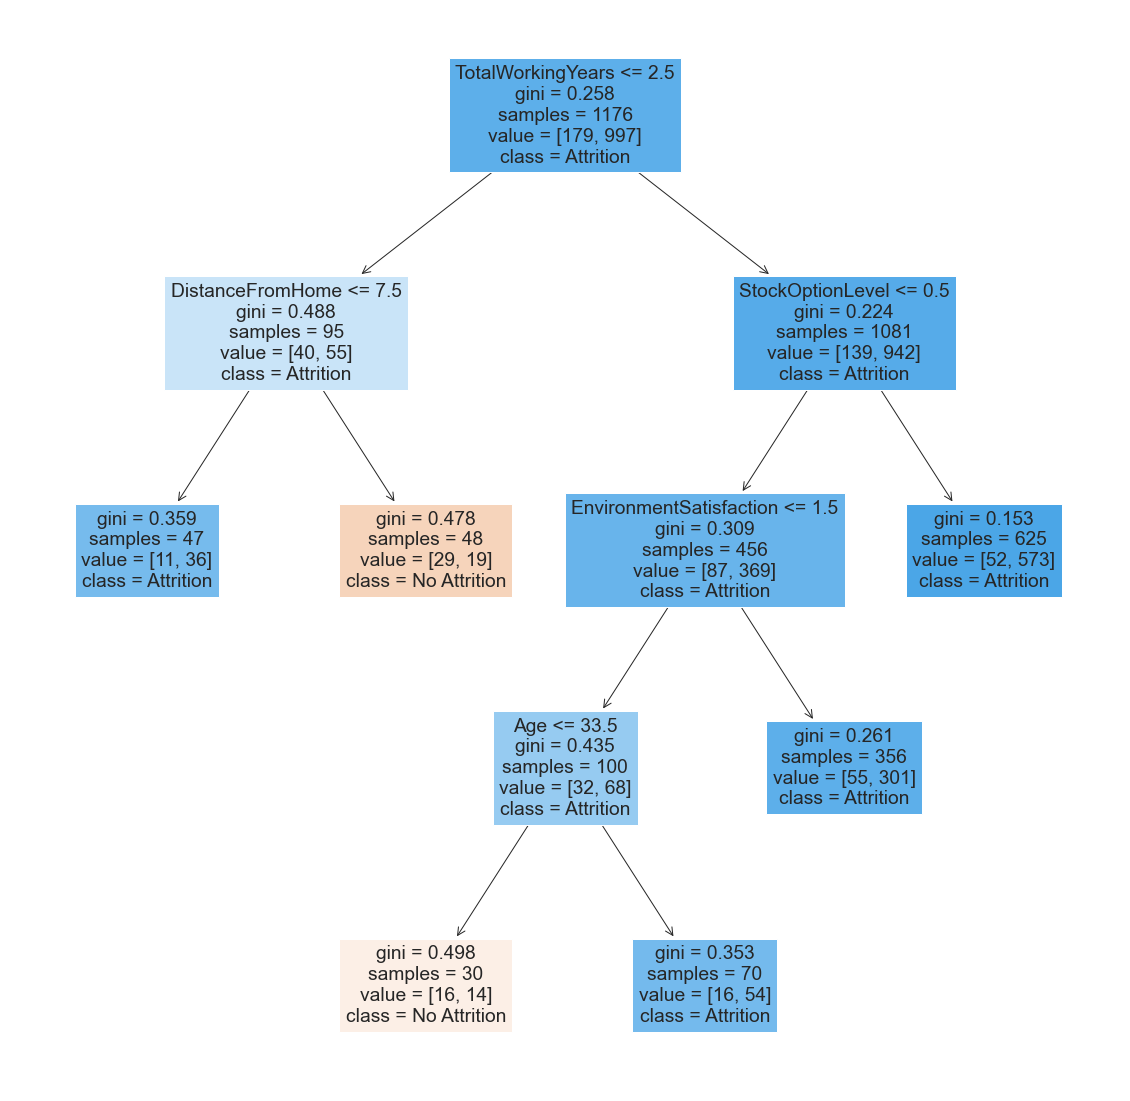

In [22]:
#visualizing the tree

plt.figure(figsize=(20,20))
features = feature_cols
classes = ['No Attrition','Attrition']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()
#plt.savefig("image1.png")

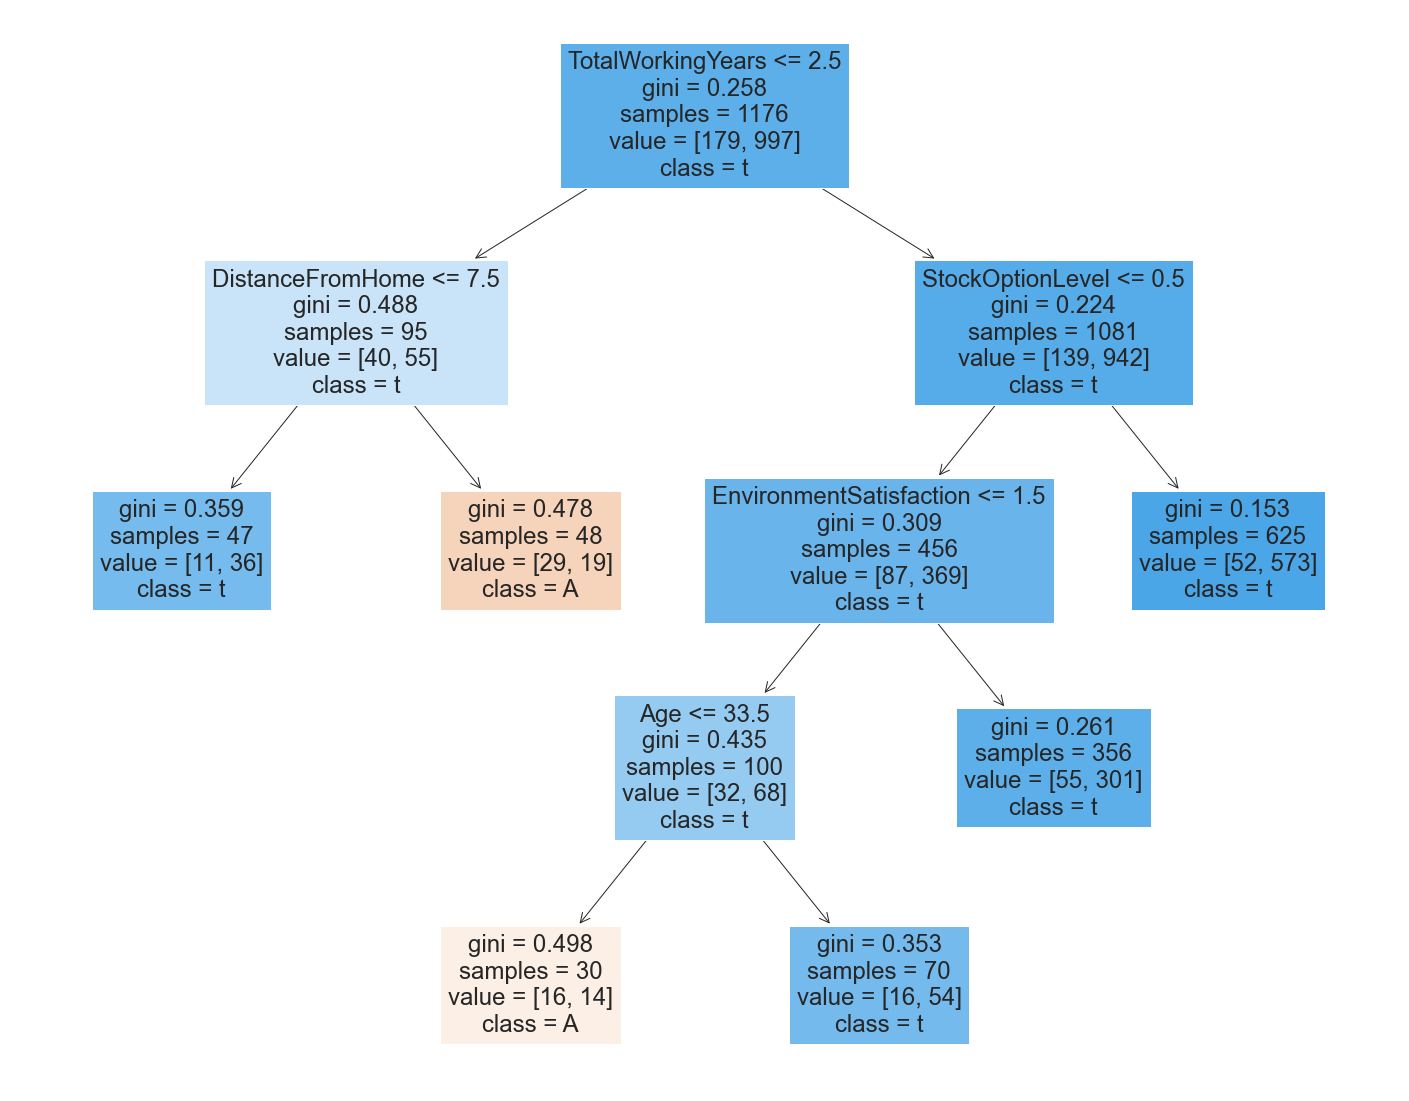

In [23]:
#visualizing the tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_cols,  
                   class_names="Attrition",
                   filled=True)
#fig.savefig("decistion_tree.png")

In [13]:
#Accuracy score
print(accuracy_score(y_train, y_train_pred), round(accuracy_score(y_test, y_test_pred), 2))

1.0 0.71


In [14]:
#Using ccp to prune
#Getting alpha values

path = clf.cost_complexity_pruning_path(X_train, y_train)
alphas=path['ccp_alphas']

alphas
#ccp_alphas, impurities = path.ccp_alphas, path.impurities
#print(ccp_alphas)

array([0.        , 0.00055775, 0.00067347, 0.00070482, 0.00074405,
       0.00074405, 0.00075586, 0.00076531, 0.00078493, 0.0007896 ,
       0.00079365, 0.00079719, 0.00080886, 0.00081048, 0.00082745,
       0.00083662, 0.00084022, 0.00085034, 0.00085034, 0.00097596,
       0.00106293, 0.00110408, 0.00113379, 0.00113379, 0.00113379,
       0.00113379, 0.00113379, 0.00113379, 0.00113379, 0.00113379,
       0.00114953, 0.00121882, 0.00123686, 0.00124922, 0.00125232,
       0.00127551, 0.00127551, 0.00127551, 0.00127551, 0.00127551,
       0.00128901, 0.00131856, 0.00132866, 0.0013552 , 0.00140633,
       0.00141717, 0.00141723, 0.00141723, 0.00144042, 0.00150878,
       0.00151172, 0.00151172, 0.00151172, 0.00152344, 0.00153061,
       0.0015361 , 0.00156986, 0.00158472, 0.00177966, 0.00182059,
       0.00183269, 0.0020061 , 0.00202429, 0.00208333, 0.00211271,
       0.00212585, 0.00219254, 0.00219886, 0.00238095, 0.00239023,
       0.00239668, 0.00257199, 0.00257228, 0.00258401, 0.00263

AttributeError: module 'numpy' has no attribute 'arrange'

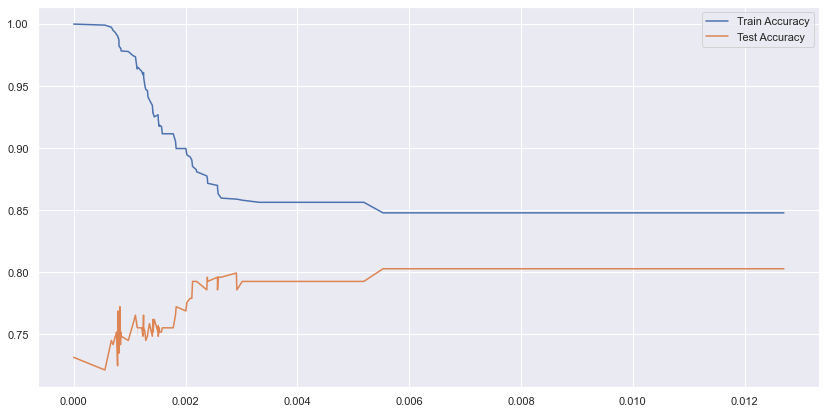

In [24]:
# For each alpha we will append our model to a list

#import seaborn
import seaborn as sns


accuracy_train, accuracy_test=[], []

for i in alphas:
    clf=DecisionTreeClassifier(ccp_alpha=i)
    
    clf.fit(X_train, y_train)
    y_train_pred=clf.predict(X_train)
    y_test_pred=clf.predict(X_test)
    
    accuracy_train.append(accuracy_score(y_train, y_train_pred))
    accuracy_test.append(accuracy_score(y_test, y_test_pred))
    
sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy_train, x=alphas, label="Train Accuracy")
sns.lineplot(y=accuracy_test, x=alphas, label="Test Accuracy")
plt.xticks(ticks=np.arrange(0.00, 0.25, 0.01))
plt.show


clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [19]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(ccp_alpha=0.00301558, random_state=40)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)


#Predict the response for train dataset
y_train_pred = clf.predict(X_train)


#Predict the response for test dataset
y_test_pred = clf.predict(X_test)

#Accuracy score
print(accuracy_score(y_train, y_train_pred), round(accuracy_score(y_test, y_test_pred), 2))

0.8579931972789115 0.79


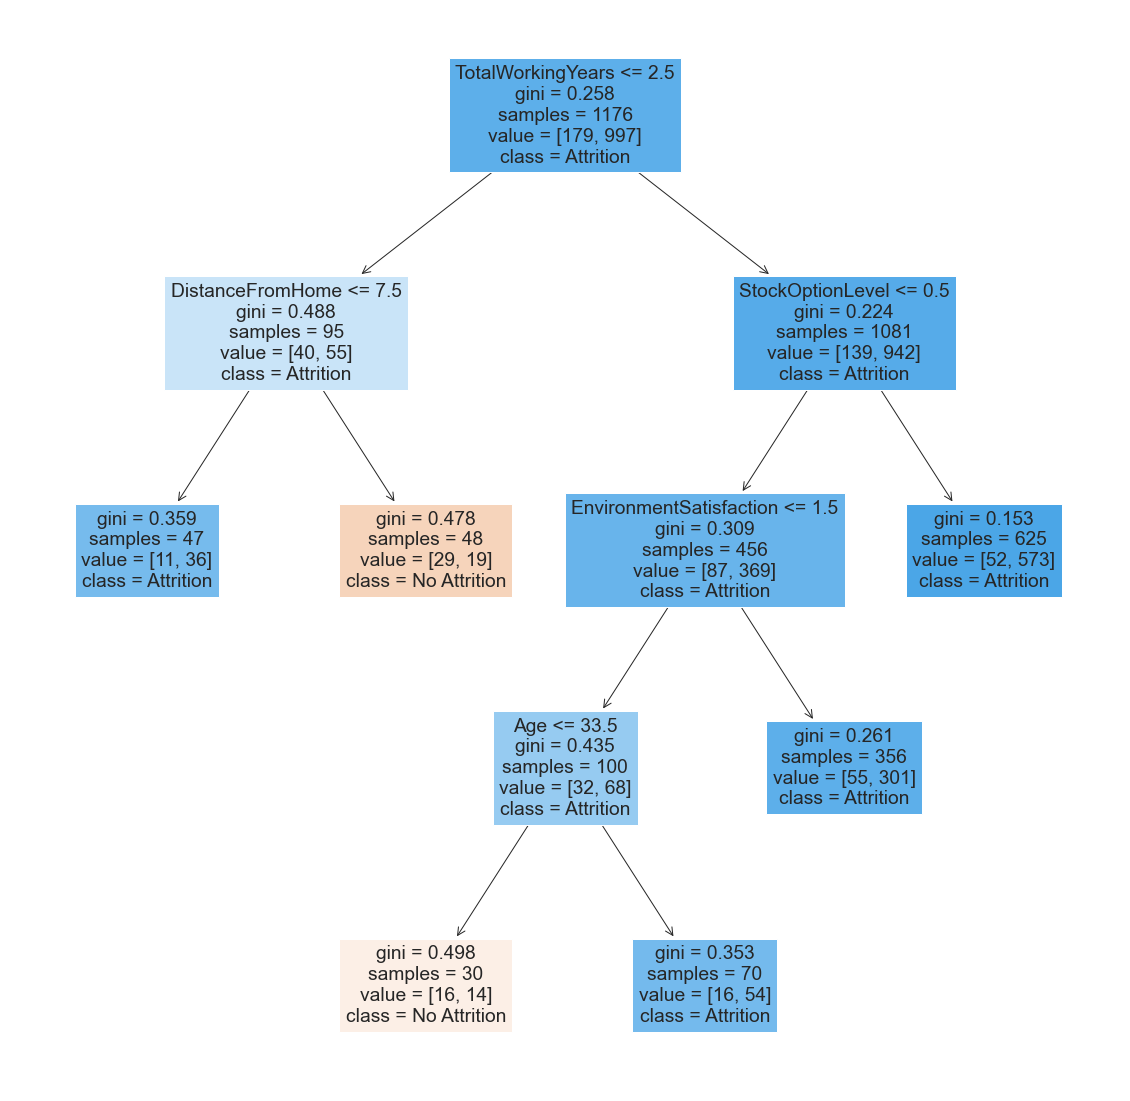

In [20]:
plt.figure(figsize=(20,20))
features = feature_cols
classes = ['No Attrition','Attrition']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()

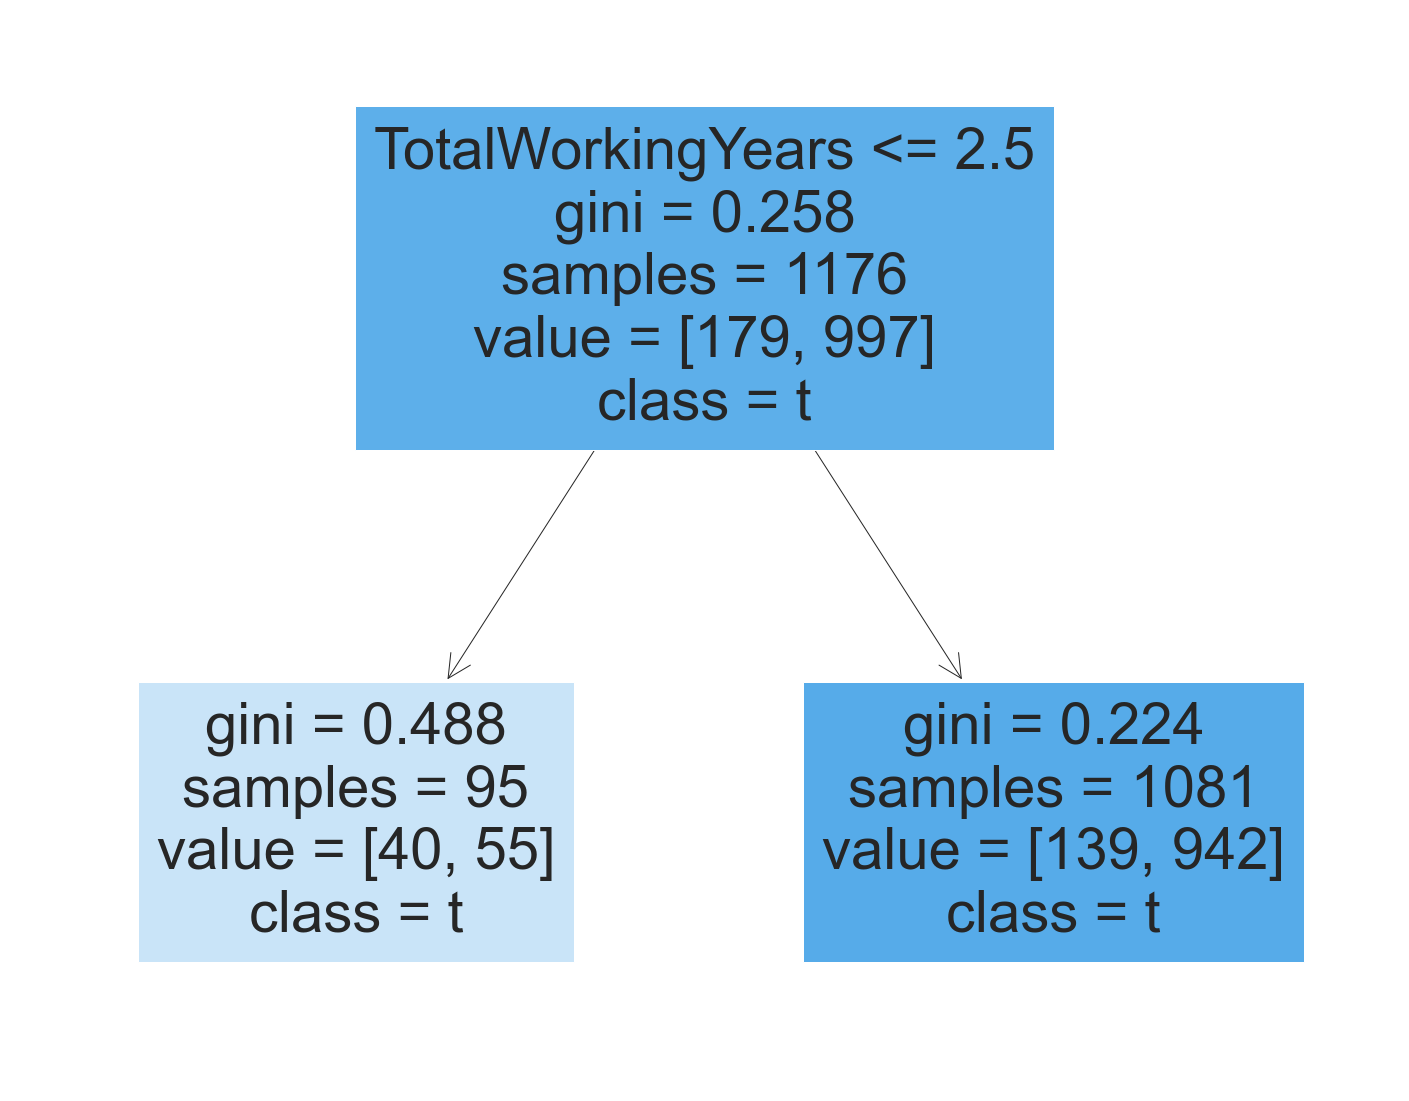

In [25]:
#visualizing the tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_cols,  
                   class_names="Attrition",
                   filled=True)
#fig.savefig("decision_tree.png")